<a href="https://colab.research.google.com/github/Nongbon/INTERNSHIP_NARIT/blob/main/M_phot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import seaborn as sns
import scipy as sp


In [7]:
!wget https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv

--2021-05-19 09:53:24--  https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22722 (22K) [text/plain]
Saving to: ‘data_phot.csv.1’

data_phot.csv.1     100%[===================>]  22.19K  --.-KB/s    in 0.001s  

2021-05-19 09:53:25 (38.9 MB/s) - ‘data_phot.csv.1’ saved [22722/22722]



In [12]:
data_phot = pd.read_csv("data_phot.csv").drop(['E(B-V)'],axis=1)
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375
...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403


In [13]:
data_phot['d_hi-d'] = data_phot.d_hi - data_phot.d_est
data_phot['d_lo-d'] = data_phot.d_lo - data_phot.d_est
data_phot['sd'] = (data_phot['d_hi-d'] + data_phot['d_lo-d']) / 2  
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,d_hi-d,d_lo-d,sd
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,2.807822,-2.729777,0.039023
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,1.558923,-1.515352,0.021786
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,0.058972,-0.058804,0.000084
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,1.221147,-1.201754,0.009696
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,2.287188,-2.237380,0.024904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,0.209875,-0.208742,0.000567
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,3.726134,-3.594222,0.065956
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,0.228997,-0.227499,0.000749
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,0.662431,-0.651813,0.005309


In [33]:
#GENERATE
data_sample = []
data_sample = pd.DataFrame(data_sample)
def GENERATE() :
  for i in range(208) :
    data_sample[i] = sp.random.normal(data_phot.d_est[i] ,data_phot.sd[i], 10**4)
    #sample_frame[i] = pd.DataFrame(data_sample[i])
    #print(i)
    print(data_sample)    
#data_sample = np.random.normal(data_phot.d_est[i] ,data_phot.sd[i], 10**4)
sample = GENERATE()
#sample = np.array(sample)
#sample_frame = pd.DataFrame(sample)
data_sample.shape
#data_sample

               0
0     192.962120
1     192.975843
2     192.948137
3     192.952556
4     192.983781
...          ...
9995  192.972712
9996  192.982646
9997  192.918453
9998  192.947568
9999  192.853962

[10000 rows x 1 columns]
               0           1
0     192.962120  106.508189
1     192.975843  106.520639
2     192.948137  106.547969
3     192.952556  106.564532
4     192.983781  106.504959
...          ...         ...
9995  192.972712  106.570016
9996  192.982646  106.511915
9997  192.918453  106.522417
9998  192.947568  106.542610
9999  192.853962  106.549798

[10000 rows x 2 columns]
               0           1          2
0     192.962120  106.508189  40.706477
1     192.975843  106.520639  40.706461
2     192.948137  106.547969  40.706332
3     192.952556  106.564532  40.706493
4     192.983781  106.504959  40.706460
...          ...         ...        ...
9995  192.972712  106.570016  40.706384
9996  192.982646  106.511915  40.706339
9997  192.918453  106.522417  40.706

(10000, 208)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


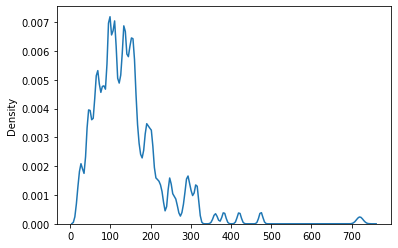

In [34]:
sns.distplot(data_sample , hist=False)

In [20]:
# M = m - 5[log(d)-1] - A
M_r = data_phot.r[0] - 5 * (np.log10(sample)-1) - data_phot.A_r[0]
M_r

""


In [21]:
np.mean(M_r)

Series([], dtype: float64)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


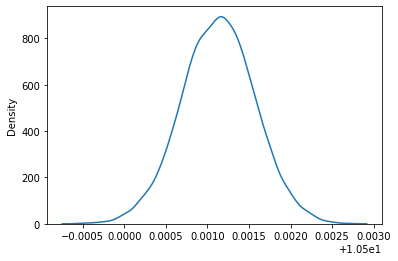

In [ ]:
sns.distplot(M_r , hist=False)